In [146]:
import pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

In [147]:
num=1000
R = 1

x1 = []
x2 = []
y = []

random.seed(10)
x1 = np.random.uniform(-R,R,num)
x2 = np.random.uniform(-R,R,num)
#print(x1,x2)

In [148]:
y = []
for i in range(len(x1)):
    if (((x1[i]**2)+(x2[i]**2)) < R**2):
        y1 = 1
    else:
        y1 = 0
    y.append(y1)
    
XY = []

for k in range (len(x1)):
    XY.append([x1[k],x2[k],y[k]])
    
XY = pd.DataFrame(XY,columns=['x1','x2','y'])

y_test = zip(y)
#print y_test

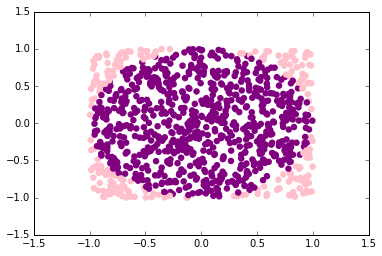

In [149]:
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
pltreal.scatter(x1,x2,color=['purple' if i[0]==1 else 'pink' for i in y_test],linewidths=2)
plt.show()

In [150]:
net = buildNetwork(2,8,1)
ds = SupervisedDataSet(2,1) #dos var dep y una ind
ds.setField('input', XY[['x1','x2']])
ds.setField('target',XY[['y']])
#ds.setField('target',[y_test])

In [151]:
trainer = BackpropTrainer(net, ds)
for i in range(800):
    trainer.train()

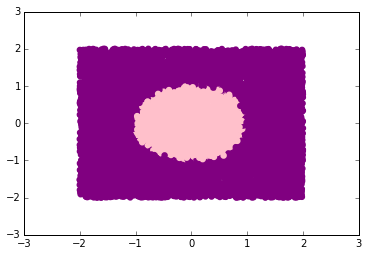

In [152]:
random.seed(10)
t1 = np.random.uniform(-2,2,10000)
t2 = np.random.uniform(-2,2,10000)


res = []
for i in range(len(t1)):
    r = net.activate([t1[i],t2[i]])
    res.append(r)

plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
pltreal.scatter(t1,t2,color=['purple' if i[0]<0.5 else 'pink' for i in res],linewidths=2)
plt.plot
plt.show()

#De acuerdo a cómo calculé los valores, aquellos que eran menor al valor del radio(1) debían ser 1 y el resto 0.
#Por lo tanto decidí que se me los clasificaba por debajo de 0.5, entonces eran el resto y si eran mayores de eso,
#entonces eran parte del círculo.

#Curva ROC & Matriz de confusión

In [153]:
#Genero datos
num=10000
R = 1

x1 = []
x2 = []
y = []

random.seed(10)
x1 = np.random.uniform(-R,R,num)
x2 = np.random.uniform(-R,R,num)

y = []
for i in range(len(x1)):
    if (((x1[i]**2)+(x2[i]**2)) < R**2):
        y1 = 1
    else:
        y1 = 0
    y.append(y1)
    
XY = []

for k in range (len(x1)):
    XY.append([x1[k],x2[k],y[k]])
    
XY = pd.DataFrame(XY,columns=['x1','x2','y'])

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XY[['x1','x2']], XY[['y']], train_size=0.75)


In [154]:
res = []
for i in range(len(X_test)):
    r = net.activate(X_test.iloc[i,:])
    res.append(r)

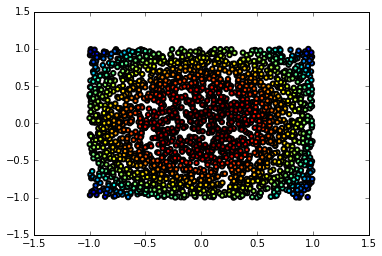

In [155]:
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
pltreal.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=res,linewidths=2)
plt.plot
plt.show()

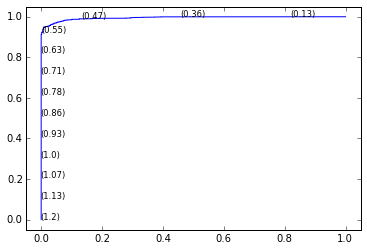

In [156]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,umbrales = roc_curve(Y_test.iloc[:,0],res)


plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
plt.plot(fpr,tpr)
plt.axis([-0.05,1.05,-0.05,1.05])
for x in range(0,len(Y_test),200):
    a = round(umbrales[x],2)
    b = [fpr[x],tpr[x]]
    pltreal.annotate('(%s)' % a,xy=b,size='small')  
plt.show()

In [157]:
auc(fpr,tpr)

0.99468408769632044

In [158]:
umbral = 0.5

y_predict = []

for i in range(len(res)):
    if res[i] > umbral:
        y_predict.append(1)
    else:
        y_predict.append(0)
        
    
#y_predict


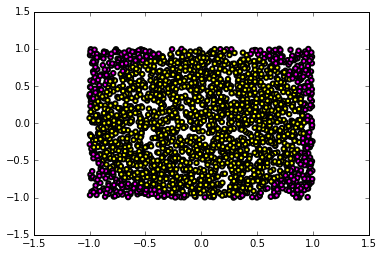

In [168]:
plt1 = plt.figure()
pltreal = plt1.add_subplot(111)
pltreal.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_predict,cmap=plt.cm.spring,linewidths=2)
plt.plot
plt.show()

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test.iloc[:,0],y_predict,labels=[0,1])

array([[ 515,   39],
       [  43, 1903]])

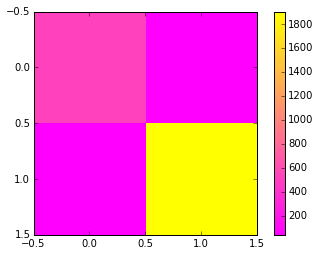

In [167]:
plt.imshow(confusion_matrix(Y_test.iloc[:,0],y_predict,labels=[0,1]),interpolation='nearest',cmap=plt.cm.spring)
plt.colorbar()
plt.show()